In [60]:
%matplotlib inline
import pandas as pd;
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

dataframe = pd.read_csv("D:\\anzics\\Datathon_2006_2015_CORE_APD_clean.csv")

Filter to ventilated only : 461654
Filter to first admission only: 441008
Filter by admission date : 440257
440257
Filter to exclude ap3diag codes  :293433
293433
Filter to exclude ap3diag subcodes  :292822
292822
Filter to exclude null pao2  :287510
287510
Filter to exclude null fio2  :287213
287213
Filter to exclude null died_hosp  :285663
285663
Filter to exclude null died_icu  :283589
283589
Filter to exclude null sex  :283533
283533


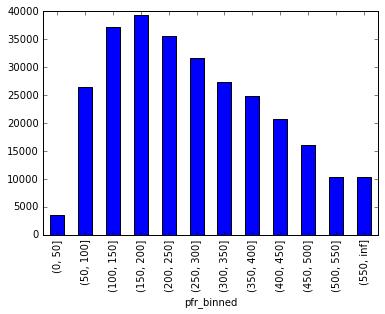

In [61]:
dataframe = dataframe[dataframe["ventilated"] == 1]
print("Filter to ventilated only : " + str(len(dataframe)))
dataframe = dataframe[dataframe["admepisode"].isin([0,1])]
print("Filter to first admission only: " + str(len(dataframe)))
dataframe = dataframe[dataframe["icu_ad_dtm"] >= '2005-01-01']
dataframe = dataframe[dataframe["icu_ds_dtm"] <= '2015-12-31']
print("Filter by admission date : " + str(len(dataframe)))

dataframe.loc[dataframe["elect"].isnull(), "elect"] = \
    np.random.choice([0,1], \
                     size=len(dataframe[dataframe["elect"].isnull()]),
                         p=[5/12, 7/12]) # TODO - formalize this

print(len(dataframe))

dataframe = dataframe[~dataframe["ap3diag"].isin([1206,1207,1208,1209,1210,1212])]

print("Filter to exclude ap3diag codes  :" + str(len(dataframe)))
print(len(dataframe))
dataframe = dataframe[~dataframe["ap3_subcode"].isin([1204.02,1213.02])];
print("Filter to exclude ap3diag subcodes  :" + str(len(dataframe)))
print(len(dataframe))
dataframe = dataframe[dataframe["pao2_anz"].notnull()]
print("Filter to exclude null pao2  :" + str(len(dataframe)))
print(len(dataframe))
dataframe = dataframe[dataframe["fio2_anz"].notnull()]
print("Filter to exclude null fio2  :" + str(len(dataframe)))
print(len(dataframe))
dataframe = dataframe[dataframe["died_hosp"].notnull()]
print("Filter to exclude null died_hosp  :" + str(len(dataframe)))
print(len(dataframe))
dataframe = dataframe[dataframe["died_icu"].notnull()]
print("Filter to exclude null died_icu  :" + str(len(dataframe)))
print(len(dataframe))
dataframe = dataframe[dataframe["sex"].notnull()]
print("Filter to exclude null sex  :" + str(len(dataframe)))
print(len(dataframe))

dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['icuadmityyyy'])], axis=1); 

dataframe["pfr"] = dataframe["pao2_anz"] / dataframe["fio2_anz"]
#pfr_bins = [0,100,299,np.inf]
pfr_bins = list(range(0, 600, 50))
pfr_bins.append(np.inf)
dataframe["pfr_binned"] = pd.cut(dataframe["pfr"], bins=pfr_bins)
dataframe[["pfr_binned"]].groupby("pfr_binned").size().plot(kind='bar')

dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['pfr_binned'],prefix="pfr")], axis=1,);

dataframe.to_csv("exported.csv")


In [62]:
died = dataframe.query('died_hosp == 1 | died_icu == 1') 
survived = dataframe.query('died_hosp == 0 & died_icu == 0') 

print("No. of patients - Total: {0} Died: {1} Survived: {2}".format(dataframe.shape[0],\
                                                                     died.shape[0],  \
                                                                     survived.shape[0]))

print("Mean age - Total: {0} Died: {1} Survived: {2}".format(dataframe["age"].mean(),\
                                                     died["age"].mean(),  \
                                                     survived["age"].mean()))

print("Stddev age - Total {0} Died: {1} Survived: {2}".format(dataframe["age"].std(),\
                                                     died["age"].std(),  \
                                                     survived["age"].std()))

print("Males - Total {0} Died: {1} Survived: {2}".format(dataframe.query("sex == 'M'").shape[0],\
                                                     died.query("sex == 'M'").shape[0],  \
                                                     survived.query("sex == 'M'").shape[0]))

#print("ICU Mortality - Total died in ICU {0}".format(died.query('died_icu == 1').shape[0]))
#print("Hospital Mortality - Total died not in ICU {0}".format(died.query('died_hosp == 1').shape[0]))

print("Mean ANZROD - Total: {0} Died: {1} Survived: {2}".format(dataframe["anzrodriskofdeath"].mean(),\
                                                     died["anzrodriskofdeath"].mean(),  \
                                                     survived["anzrodriskofdeath"].mean()))

print("Stddev ANZROD - Total {0} Died: {1} Survived: {2}".format(dataframe["anzrodriskofdeath"].std(),\
                                                     died["anzrodriskofdeath"].std(),  \
                                                     survived["anzrodriskofdeath"].std()))

print("Mean PAO2_ANZ - Total: {0} Died: {1} Survived: {2}".format(dataframe["pao2_anz"].mean(),\
                                                     died["pao2_anz"].mean(),  \
                                                     survived["pao2_anz"].mean()))

print("Stddev PAO2_ANZ - Total {0} Died: {1} Survived: {2}".format(dataframe["pao2_anz"].std(),\
                                                     died["pao2_anz"].std(),  \
                                                     survived["pao2_anz"].std()))


print("Median FIO2_ANZ - Total: {0} Died: {1} Survived: {2}".format(dataframe["fio2_anz"].median(),\
                                                     died["fio2_anz"].median(),  \
                                                     survived["fio2_anz"].median()))

print("IQR FIO2_ANZ - Total: {0} Died: {1} Survived: {2}".format(\
dataframe["fio2_anz"].quantile(0.75) - dataframe["fio2_anz"].quantile(0.25),\
died["fio2_anz"].quantile(0.75) - died["fio2_anz"].quantile(0.25),\
survived["fio2_anz"].quantile(0.75) - survived["fio2_anz"].quantile(0.25)))


print("Mean PFR - Total: {0} Died: {1} Survived: {2}".format(dataframe["pfr"].mean(),\
                                                     died["pfr"].mean(),  \
                                                     survived["pfr"].mean()))

print("Stddev PFR - Total: {0} Died: {1} Survived: {2}".format(dataframe["pfr"].std(),\
                                                     died["pfr"].std(),  \
                                                     survived["pfr"].std()))

print("Mean hmgnhi - Total: {0} Died: {1} Survived: {2}".format(dataframe["hmgnhi"].mean(),\
                                                     died["hmgnhi"].mean(),  \
                                                     survived["hmgnhi"].mean()))

print("Stddev hmgnhi - Total {0} Died: {1} Survived: {2}".format(dataframe["hmgnhi"].std(),\
                                                     died["hmgnhi"].std(),  \
                                                     survived["hmgnhi"].std()))

print("Elective - Total {0} Died: {1} Survived: {2}".format(dataframe.query('elect == 1').shape[0],
                                                            died.query('elect == 1').shape[0],
                                                            survived.query('elect == 1').shape[0]))


print("Non-elective - Total {0} Died: {1} Survived: {2}".format(dataframe.query('elect == 0').shape[0],
                                                            died.query('elect == 0').shape[0],
                                                            survived.query('elect == 0').shape[0]))

print("Chronic-resp (%) - Total {0} Died: {1} Survived: {2}".format(dataframe.query('chr_resp == 1').shape[0] / dataframe.shape[0],
                                                            died.query('chr_resp == 1').shape[0] / died.shape[0],
                                                            survived.query('chr_resp == 1').shape[0] / survived.shape[0]))

print("Chronic CVS (%) - Total {0} Died: {1} Survived: {2}".format(dataframe.query('chr_cvs == 1').shape[0] / dataframe.shape[0],
                                                            died.query('chr_cvs == 1').shape[0] / died.shape[0],
                                                            survived.query('chr_cvs == 1').shape[0] / survived.shape[0]))

print("Chronic Ren (%) - Total {0} Died: {1} Survived: {2}".format(dataframe.query('chr_ren == 1').shape[0] / dataframe.shape[0],
                                                            died.query('chr_ren == 1').shape[0] / died.shape[0],
                                                            survived.query('chr_ren == 1').shape[0] / survived.shape[0]))

print("GCS < 15 (%) - Total {0} Died: {1} Survived: {2}".format(dataframe.query('gcs < 15').shape[0] / dataframe.shape[0],
                                                            died.query('gcs < 15').shape[0] / died.shape[0],
                                                            survived.query('gcs < 15').shape[0] / survived.shape[0]))

No. of patients - Total: 283533 Died: 59252 Survived: 224281
Mean age - Total: 57.87430173084664 Died: 65.4737768121759 Survived: 55.8667391396358
Stddev age - Total 19.130222326560336 Died: 16.57323254662745 Survived: 19.25609004054565
Males - Total 167961 Died: 35624 Survived: 132337
Mean ANZROD - Total: 0.19869729171207623 Died: 0.4750426610241015 Survived: 0.12569059108885697
Stddev ANZROD - Total 0.24341152627360177 Died: 0.28095283211221106 Survived: 0.1689489530895869
Mean PAO2_ANZ - Total: 158.46109976616478 Died: 145.09041045028016 Survived: 161.99345463949243
Stddev PAO2_ANZ - Total 113.54240814906525 Died: 109.39809798849392 Survived: 114.35172093091505
Median FIO2_ANZ - Total: 0.5 Died: 0.6 Survived: 0.5
IQR FIO2_ANZ - Total: 0.5 Died: 0.5 Survived: 0.4
Mean PFR - Total: 275.2930579357327 Died: 229.8368493086219 Survived: 287.30197208170256
Stddev PFR - Total: 160.42221650570184 Died: 153.29268968042524 Survived: 160.11304699236865
Mean hmgnhi - Total: 11.972240482547335 Di

Index([                  'siteid', 'hospitalclassificationid',
         'hospitalclassification',          'publicprivateid',
                  'publicprivate',                'patientid',
                 'icuadmityyyymm',             'icuadmityyyy',
                     'icu_ad_dtm',               'icu_ds_dtm',
       ...
                   'pao2_(0, 20]',            'pao2_(20, 40]',
                  'pao2_(40, 60]',            'pao2_(60, 80]',
                 'pao2_(80, 100]',          'pao2_(100, 120]',
                'pao2_(120, 140]',          'pao2_(140, 160]',
                'pao2_(160, 180]',          'pao2_(180, inf]'],
      dtype='object', length=195)

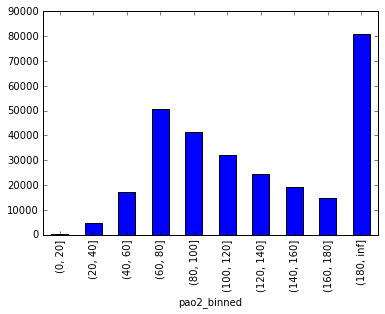

In [13]:
#pao2_bins = [0,50,60,100,np.inf]
pao2_bins = list(range(0, 200, 20))
pao2_bins.append(np.inf)
#pao2_cols = ['pao2_(0, 50]','pao2_(50, 60]','pao2_(60, 100]','pao2_(100, inf]']
pao2_cols = ["pao2_(" + str(pao2_bins[i-1]) + ", " + str(pao2_bins[i]) + "]" for i in range(1, len(pao2_bins))] 
dataframe["pao2_binned"] = pd.cut(dataframe["pao2_anz"],bins=pao2_bins)
dataframe[["pao2_binned"]].groupby('pao2_binned').size().plot(kind='bar')
dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['pao2_binned'],prefix="pao2")], axis=1,);
dataframe.columns



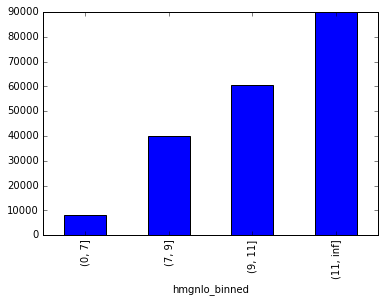

In [14]:
hmgnlo_bins = [0,7,9,11,np.inf]
dataframe["hmgnlo_binned"] = pd.cut(dataframe["hmgnlo"],bins=hmgnlo_bins)
dataframe[["hmgnlo_binned"]].groupby("hmgnlo_binned").size().plot(kind='bar')
dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['hmgnlo_binned'],prefix="hmgnlo")], axis=1,);

In [15]:
pfrs = ["pfr_(" + str(pfr_bins[i-1]) + ", " + str(pfr_bins[i]) + "]" for i in range(1, len(pfr_bins))] #['pfr_(0, 100]','pfr_(100, 299]','pfr_(299, inf]']

hmgn = ["hmgnlo_(" + str(hmgnlo_bins[i-1]) + ", " + str(hmgnlo_bins[i]) + "]" for i in range(1, len(hmgnlo_bins))] # ["hmgnlo_(0, 7]","hmgnlo_(7, 9]","hmgnlo_(9, 11]","hmgnlo_(11, inf]"]

pfr_hmgn_combinations = []
pao2_hmgn_combinations = []

import itertools
for col in list(itertools.product(pfrs, hmgn)):
    pfr_hmgn_combinations.append(str(col[0] + col[1]))
    dataframe[str(col[0] + col[1])] = dataframe[col[0]] & dataframe[col[1]]
    
for col in list(itertools.product(pao2_cols, hmgn)):
    pao2_hmgn_combinations.append(str(col[0] + col[1]))
    dataframe[str(col[0] + col[1])] = dataframe[col[0]] & dataframe[col[1]]

dataframe.columns

Index([                         'siteid',        'hospitalclassificationid',
                'hospitalclassification',                 'publicprivateid',
                         'publicprivate',                       'patientid',
                        'icuadmityyyymm',                    'icuadmityyyy',
                            'icu_ad_dtm',                      'icu_ds_dtm',
       ...
         'pao2_(140, 160]hmgnlo_(9, 11]', 'pao2_(140, 160]hmgnlo_(11, inf]',
          'pao2_(160, 180]hmgnlo_(0, 7]',    'pao2_(160, 180]hmgnlo_(7, 9]',
         'pao2_(160, 180]hmgnlo_(9, 11]', 'pao2_(160, 180]hmgnlo_(11, inf]',
          'pao2_(180, inf]hmgnlo_(0, 7]',    'pao2_(180, inf]hmgnlo_(7, 9]',
         'pao2_(180, inf]hmgnlo_(9, 11]', 'pao2_(180, inf]hmgnlo_(11, inf]'],
      dtype='object', length=288)

In [16]:
pfr_base = pfrs[-1]
pao2_base = pao2_cols[-1]

pfr_adjusted_base = pfr_base + hmgn[-1]
pao2_adjusted_base = pao2_base + hmgn[-1]

base_train_cols = ["agescore","albuminscore","bilirubinscore",
                  "creatininescore","glucosescore","heartratescore",
                      "meanarterialpressurescore","sodiumscore","neurologicalscore",
                          "phscore","respiratoryratescore","temperaturescore",
                              "ureascore","urineoutputscore","whitecellcountscore",
                                   "chr_resp","chr_cvs","chr_liv","chr_ren",
                                      "immundis","immunrx","aids","hepfail",
                                           "lymphoma","metast","leukaem","immunsup","cirrhos","elect"] + list(range(2006,2015))

pfr_train_cols = base_train_cols

pao2_train_cols = base_train_cols + ["fio2_anz"]


Optimization terminated successfully.
         Current function value: 0.495860
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              died_hosp   No. Observations:               285663
Model:                          Logit   Df Residuals:                   285651
Method:                           MLE   Df Model:                           11
Date:                Thu, 09 Mar 2017   Pseudo R-squ.:                 0.03158
Time:                        11:31:15   Log-Likelihood:            -1.4165e+05
converged:                       True   LL-Null:                   -1.4627e+05
                                        LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
pfr_(0, 50]       -0.2024      0.034     -5.982      0.000        -0.269    -0.136
pfr_(50, 100]    

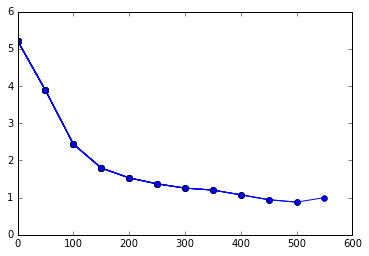

In [17]:
# Unadjusted OR- PF RATIO
logit = sm.Logit(dataframe["died_hosp"], dataframe[pfrs])

# fit the model
result = logit.fit()

print(result.summary())

with open("pfr_unadjusted_odds.csv",'w') as out:
    out.write(result.summary().as_csv())

odds = np.exp(result.params)

print(odds)
base = odds[pfr_base]
xs = []
ys = []
for pfr_group in pfrs:
    xs.append(pfr_bins[pfrs.index(pfr_group)])
    ys.append(odds[str(pfr_group)] / base)
    plt.plot(xs, ys, color="blue", linestyle='-',marker="o")
#plt.legend(hmgn)
plt.show()

Optimization terminated successfully.
         Current function value: 0.507440
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              died_hosp   No. Observations:               285663
Model:                          Logit   Df Residuals:                   285653
Method:                           MLE   Df Model:                            9
Date:                Thu, 09 Mar 2017   Pseudo R-squ.:                0.008963
Time:                        11:31:17   Log-Likelihood:            -1.4496e+05
converged:                       True   LL-Null:                   -1.4627e+05
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
pao2_(0, 20]       -0.5108      0.133     -3.831      0.000        -0.772    -0.249
pao2_(20, 40] 

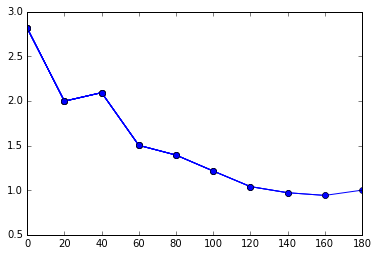

In [18]:
# Unadjusted OR- PAO2
logit = sm.Logit(dataframe["died_hosp"], dataframe[pao2_cols])

# fit the model
result = logit.fit()

print(result.summary())

with open("pao2_unadjusted_odds.csv",'w') as out:
    out.write(result.summary().as_csv())

odds = np.exp(result.params)

print(odds)

base = odds[pao2_base]

xs = []
ys = []
for pao2_group in pao2_cols:
    xs.append(pao2_bins[pao2_cols.index(pao2_group)])
    ys.append(odds[str(pao2_group)] / base)
    plt.plot(xs, ys, color="blue", linestyle='-',marker="o")
#plt.legend(hmgn)
plt.show()

Optimization terminated successfully.
         Current function value: 0.382366
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              died_hosp   No. Observations:               285663
Model:                          Logit   Df Residuals:                   285613
Method:                           MLE   Df Model:                           49
Date:                Thu, 09 Mar 2017   Pseudo R-squ.:                  0.2532
Time:                        11:31:24   Log-Likelihood:            -1.0923e+05
converged:                       True   LL-Null:                   -1.4627e+05
                                        LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
agescore                      0.0770      0.001     89.342      0.000         

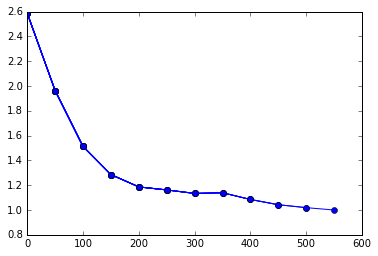

In [19]:
# Adjusted OR without Hb - PFR 
logit = sm.Logit(dataframe["died_hosp"], dataframe[pfr_train_cols + pfrs])

# fit the model
result = logit.fit()

print(result.summary())

with open("pao2_adjusted_odds_nohb.csv",'w') as out:
    out.write(result.summary().as_csv())

odds = np.exp(result.params)

print(odds)

base = odds[pfr_base] 

xs = []
ys = []
for pfr_group in pfrs:
    xs.append(pfr_bins[pfrs.index(pfr_group)])
    ys.append(odds[str(pfr_group)] / base)
    plt.plot(xs, ys, color="blue", linestyle='-',marker="o")
#plt.legend(hmgn)
plt.show()

In [20]:
# Adjusted OR without Hb - PAO2 
logit = sm.Logit(dataframe["died_hosp"], dataframe[pao2_train_cols + pao2_cols])

# fit the model
result = logit.fit()

print(result.summary())

with open("pao2_adjusted_odds_nohb.csv",'w') as out:
    out.write(result.summary().as_csv())

odds = np.exp(result.params)

print(odds)

base = odds[pao2_base] 

xs = []
ys = []
for pao2_group in pao2_cols:
    xs.append(pao2_bins[pao2_cols.index(pao2_group)])
    ys.append(odds[str(pao2_group)] / base)
    plt.plot(xs, ys, color="blue", linestyle='-',marker="o")
#plt.legend(hmgn)
plt.show()

Optimization terminated successfully.
         Current function value: 0.382007
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              died_hosp   No. Observations:               285663
Model:                          Logit   Df Residuals:                   285614
Method:                           MLE   Df Model:                           48
Date:                Thu, 09 Mar 2017   Pseudo R-squ.:                  0.2539
Time:                        11:31:33   Log-Likelihood:            -1.0913e+05
converged:                       True   LL-Null:                   -1.4627e+05
                                        LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
agescore                      0.0768      0.001     89.381      0.000         

Optimization terminated successfully.
         Current function value: 0.438004
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              died_hosp   No. Observations:               285663
Model:                          Logit   Df Residuals:                   285577
Method:                           MLE   Df Model:                           85
Date:                Thu, 09 Mar 2017   Pseudo R-squ.:                  0.1446
Time:                        11:31:53   Log-Likelihood:            -1.2512e+05
converged:                       True   LL-Null:                   -1.4627e+05
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
agescore                           0.0421      0.001     54.500     

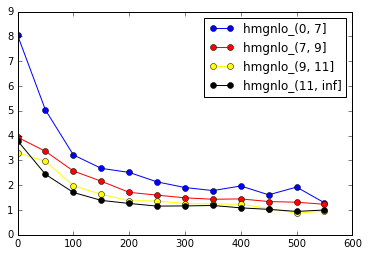

In [21]:
# Adjusted OR with Hb - PFR
logit = sm.Logit(dataframe["died_hosp"], dataframe[pfr_train_cols + pfr_hmgn_combinations])

# fit the model
result = logit.fit()

print(result.summary())

with open("pfr_adjusted_odds_hb.csv",'w') as out:
    out.write(result.summary().as_csv())

odds = np.exp(result.params)

base = odds[pfr_adjusted_base] 
colors = ["blue","red","yellow","black"]

for hmgn_group in hmgn:
    xs = []
    ys = []
    for pfr_group in pfrs:
    #plt.scatter(pfr_bins[pfrs.index(pfr_group)], odds[str(pfr_group + hmgn_group)] / base, 
     #           color=colors[hmgn.index(hmgn_group)], linestyle='-')
        xs.append(pfr_bins[pfrs.index(pfr_group)])
        ys.append(odds[str(pfr_group + hmgn_group)] / base)
    plt.plot(xs, ys, color=colors[hmgn.index(hmgn_group)], linestyle='-',marker="o")
plt.legend(hmgn)
plt.show()

In [22]:
# Adjusted OR with Hb - PAO2

logit = sm.Logit(dataframe["died_hosp"], dataframe[pao2_train_cols + pao2_hmgn_combinations])

# fit the model
result = logit.fit()

print(result.summary())

with open("pao2_adjusted_odds_hb.csv",'w') as out:
    out.write(result.summary().as_csv())

odds = np.exp(result.params)

base = odds[pao2_adjusted_base] 
colors = ["blue","red","yellow","black"]

for hmgn_group in hmgn:
    xs = []
    ys = []
    for pao2_group in pao2_cols:
    #plt.scatter(pfr_bins[pfrs.index(pfr_group)], odds[str(pfr_group + hmgn_group)] / base, 
     #           color=colors[hmgn.index(hmgn_group)], linestyle='-')
        xs.append(pao2_bins[pao2_cols.index(pao2_group)])
        ys.append(odds[str(pao2_group + hmgn_group)] / base)
    plt.plot(xs, ys, color=colors[hmgn.index(hmgn_group)], linestyle='-',marker="o")
plt.legend(hmgn)
plt.show()

Optimization terminated successfully.
         Current function value: 0.436478
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              died_hosp   No. Observations:               285663
Model:                          Logit   Df Residuals:                   285584
Method:                           MLE   Df Model:                           78
Date:                Thu, 09 Mar 2017   Pseudo R-squ.:                  0.1476
Time:                        11:32:05   Log-Likelihood:            -1.2469e+05
converged:                       True   LL-Null:                   -1.4627e+05
                                        LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
agescore                            0.0450      0.001     58.079  